In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [92]:
df.shape

(13320, 9)

In [93]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [94]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [95]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [97]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [98]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [99]:
df=df.drop(['area_type','availability','society','balcony'],axis=1)

In [100]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [101]:
df.tail()

,location,size,total_sqft,bath,price
13315,Whitefield,5 Bedroom,3453,4.0,231.0
13316,Richards Town,4 BHK,3600,5.0,400.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0
13319,Doddathoguru,1 BHK,550,1.0,17.0


In [102]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [103]:
df=df.dropna()

In [104]:
df.shape

(13246, 5)

In [105]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [106]:
df['BHK']=df['size'].apply(lambda x:int(x.split(' ')[0]))

In [107]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [108]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [109]:
df['BHK'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK, dtype: int64

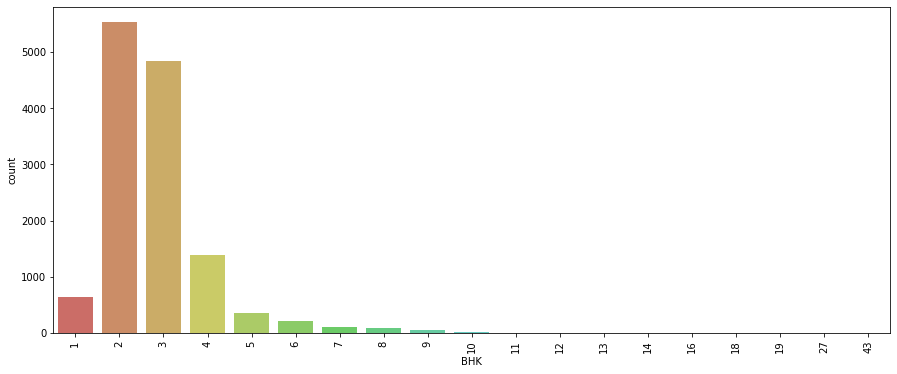

In [110]:
##count plot of the BHK columns
plt.figure(figsize=(15,6))
sns.countplot("BHK",data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [111]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [112]:
df['bath'].value_counts()

2.0     6908
3.0     3285
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

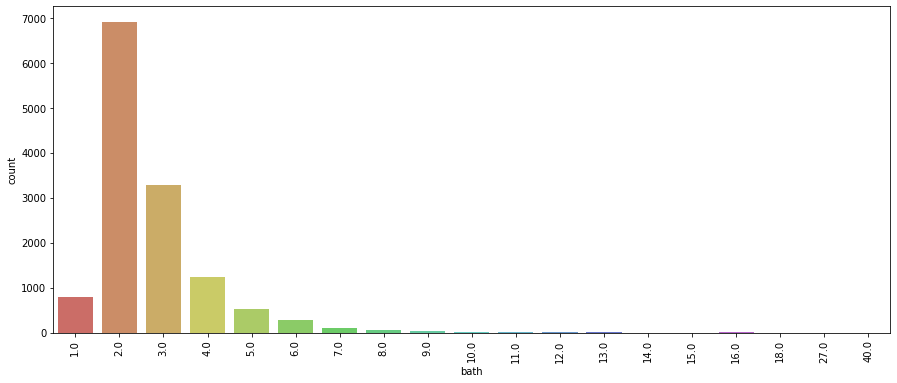

In [113]:
##count plot of the bath columns
plt.figure(figsize=(15,6))
sns.countplot("bath",data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [114]:
df[df.BHK>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [115]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [116]:
df[~df['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [117]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [118]:
df=df.copy()
df['total_sqft']=df['total_sqft'].apply(convert_sqft_tonum)

In [119]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [120]:
df.loc[20]

location      Kengeri
size            1 BHK
total_sqft      600.0
bath              1.0
price            15.0
BHK                 1
Name: 20, dtype: object

In [124]:
df1=df.copy()
df1['price_per_sqft']=df1['price']*1000000/df1['total_sqft']

In [125]:
df1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [126]:
len(df1.location.unique())

1304

In [127]:
df1.location=df1.location.apply(lambda x:x.strip())
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [128]:
a=len(location_stats[location_stats<=10])
print(a)

1052


In [129]:
locationLessThan10=location_stats[location_stats<=10]
locationLessThan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [132]:
len(df1.location.unique())

1293

In [133]:
df1.location = df1.location.apply(lambda x : 'Other Location' if x in locationLessThan10 else x)
b = len(df1.location.unique())
print(b)

242


In [134]:
df1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [135]:
# Checking what all entries have less than 300 sqft per bedroom. 300 is our base limit
df1[df1.total_sqft/df1.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Other Location,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,Other Location,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [137]:
df2=df1[~(df1.total_sqft/df1.BHK<300)]
df2.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [138]:
df2.shape

(12502, 7)

In [139]:
df2['price_per_sqft'].describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: price_per_sqft, dtype: object

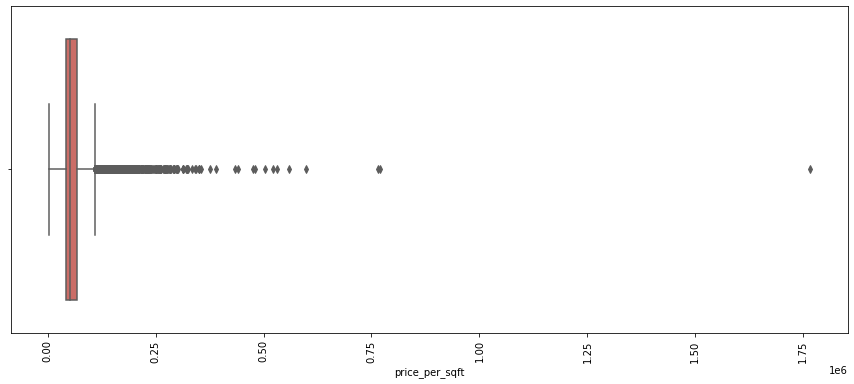

In [140]:
plt.figure(figsize=(15,6))
sns.boxplot("price_per_sqft",data=df2,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [152]:
##remove outliers
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m=np.mean(sub_df.price_per_sqft) #mean of the price_per_sqft columns
        st=np.std(sub_df.price_per_sqft) #stdanderd daviation of the price_per_sqft columns
        reduce_df=sub_df[(sub_df.price_per_sqft >(m-st)) & (sub_df.price_per_sqft <(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df3=remove_pps_outliers(df2)
df3.shape
    

(10241, 7)

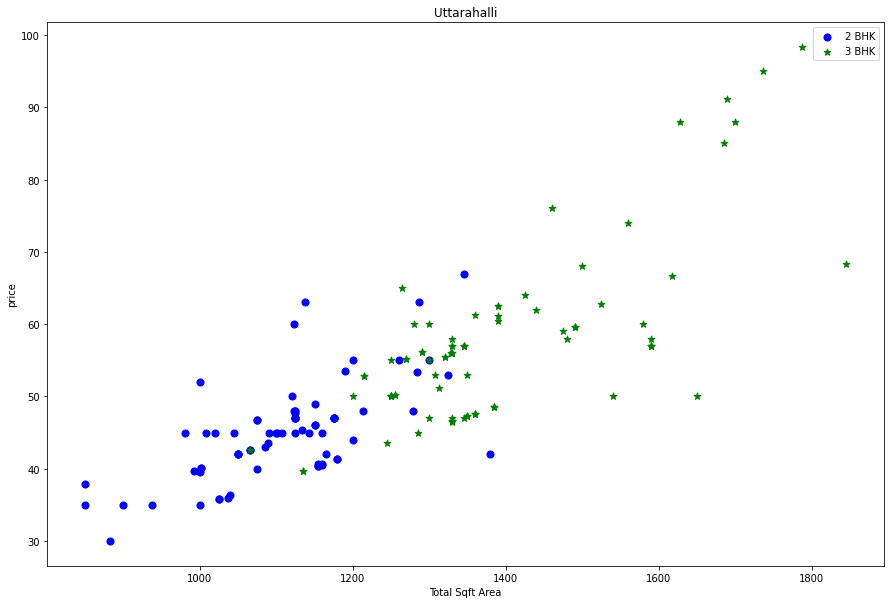

In [166]:
#import matplotlib.pyplot as plt
'''in some case there is high price of 2 bhk than 3 bhk so that type of data will be shown using scatter plot 
and we have to remove it'''
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='*', label='3 BHK', s=50)
    plt.xlabel("Total Sqft Area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df3,'Uttarahalli')    

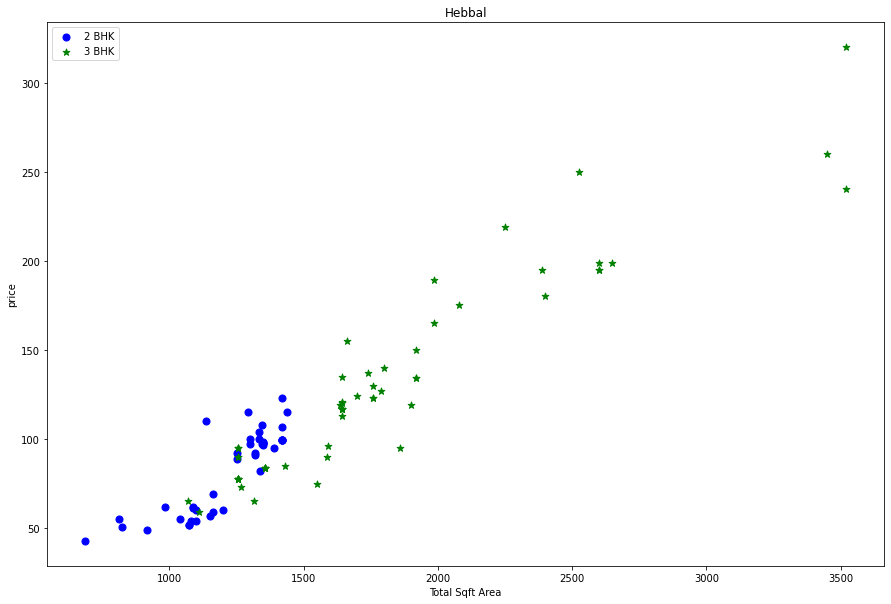

In [167]:
plot_scatter_chart(df3,'Hebbal')    

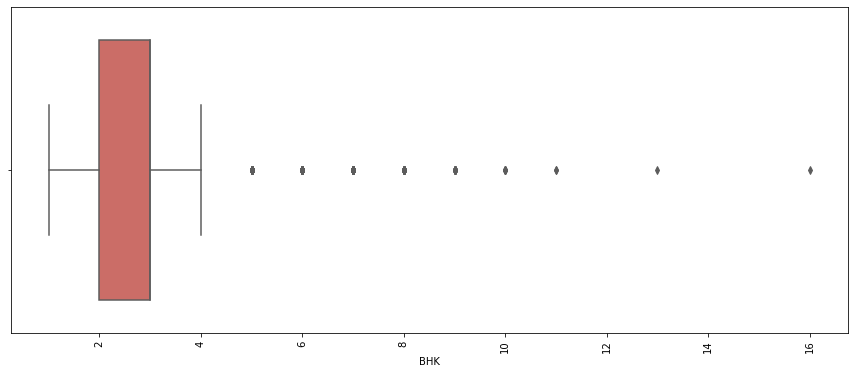

In [168]:
plt.figure(figsize=(15,6))
sns.boxplot("BHK",data=df2,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [170]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outlier(df3)
df4.shape

(7329, 7)

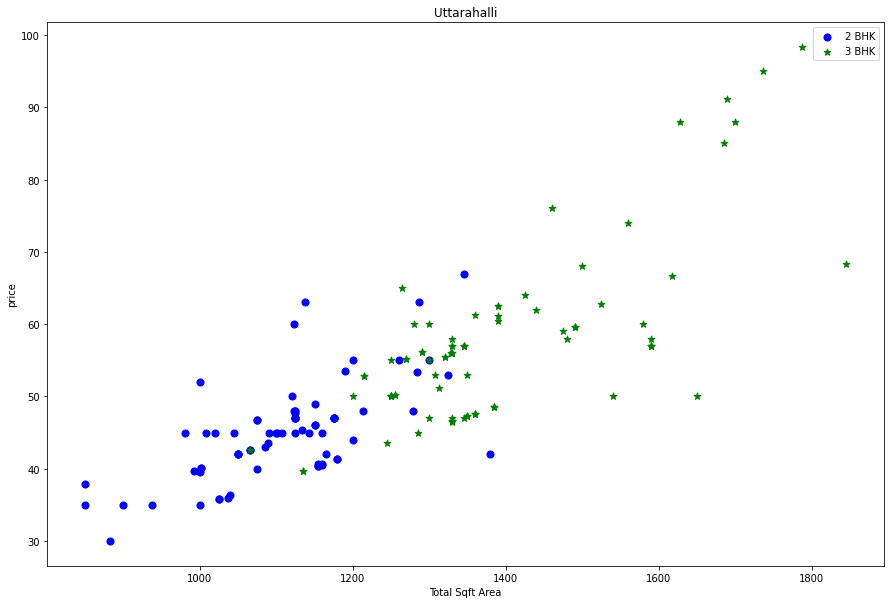

In [171]:
plot_scatter_chart(df3,'Uttarahalli')

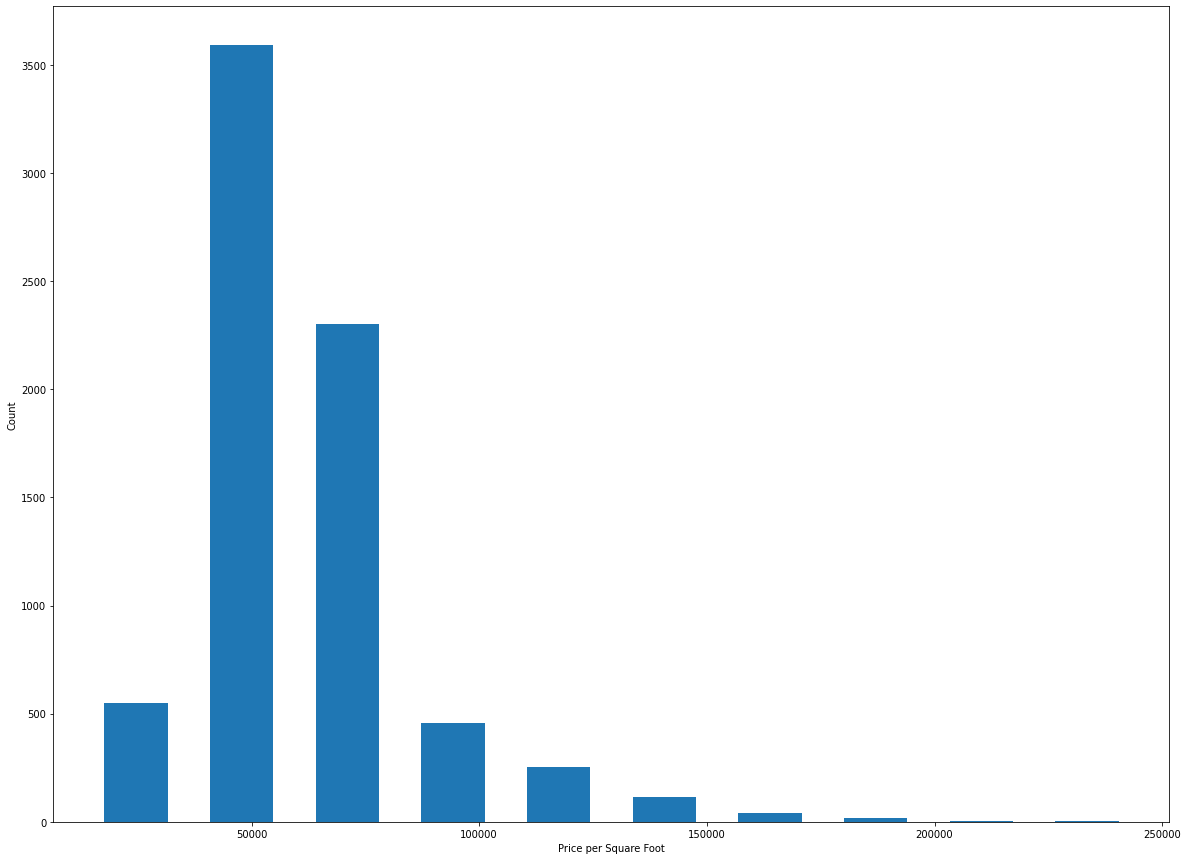

In [179]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(df4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price per Square Foot")
plt.ylabel("Count")
plt.show()

In [181]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [182]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00000
5925,Other Location,10 BHK,12000.0,12.0,525.0,10,43750.00000
6014,Other Location,16 BHK,10000.0,16.0,550.0,16,55000.00000
6747,Other Location,11 BHK,6000.0,12.0,150.0,11,25000.00000
7078,Other Location,13 BHK,5425.0,13.0,275.0,13,50691.24424


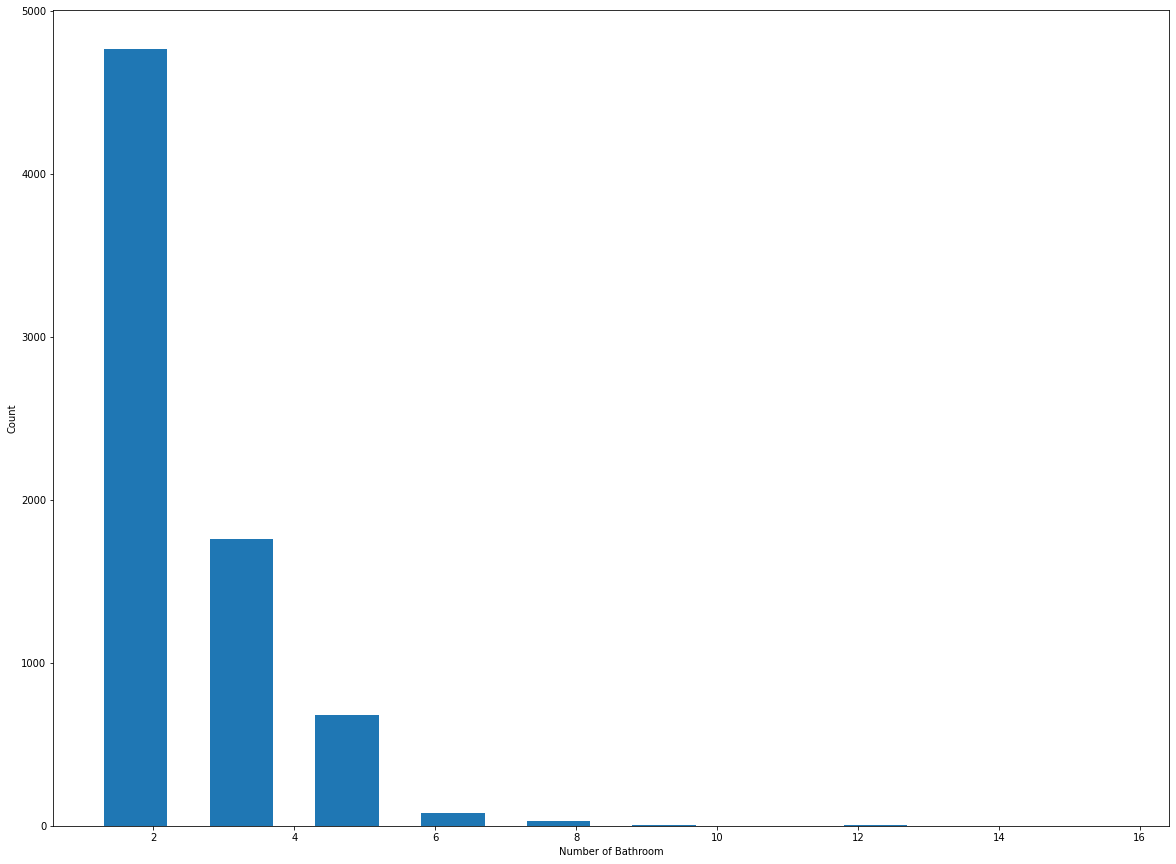

In [184]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(df4.bath,rwidth=0.6)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")
plt.show()

In [185]:
df4[df4.bath>df4.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
5850,Other Location,6 BHK,11338.0,9.0,1000.0,6,88198.976892
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300


In [186]:
df5=df4[df4.bath<df4.BHK+2]
df5.shape

(7251, 7)

In [187]:
df6 = df5.drop(['size','price_per_sqft'], axis='columns')
df6.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### In above dataframe you can see location has text data but machine learning model can't handle so we have to create numeric values for location

In [189]:
# to generate numeric values of text location
dummies = pd.get_dummies(df6.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
# now we are appending this dummy dataframe to our main dataframe
# here we are dropping other column from dummies we can call them as all zeros
df7 = pd.concat([df6,dummies.drop('Other Location', axis='columns')],axis = 'columns')
df7.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# now drop location column which will not usefull in model building
df8 = df7.drop('location', axis='columns')
df8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
df8.shape

(7251, 245)

In [195]:
# indipendent variables
X = df8.drop('price', axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
# dependent variable
y = df8.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [198]:
#Spliting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [199]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train) # Training
lr_clf.score(X_test, y_test) # getting the score of model 

0.8691914452174406